## **Data Preperation and Preprocessing**

In [54]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [55]:
# Load our Dataset
data = pd.read_csv('/content/sample_data/cancer_reg.csv' , encoding='latin-1')

In [56]:
# Step 3: Split data into features (independent variables) and target (dependent variable)
X = data.drop(columns=['TARGET_deathRate','binnedInc','Geography'])  # Independent variables
y = data['TARGET_deathRate']  # Dependent variable

In [57]:
# Step 4: Handle missing values in the dataset
# Use SimpleImputer to replace NaN values with the mean of the columns
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)  # Impute missing values in X


In [58]:
# Step 5: Split the data into training + validation (80%) and testing sets (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Step 6: Split the training + validation set into training (70%) and validation (30%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

## **Training and Building the Linear Regression Model**

In [60]:
# Step 7: Train a Linear Regression model on the training set
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [61]:
# Step 8: Test the trained linear regression model using the test set
y_test_pred_lr = linear_model.predict(X_test)

## **Testing R-Squared for Linear Regression Model**

In [62]:
test_r2_lr = r2_score(y_test, y_test_pred_lr)
mse_lr = mean_squared_error(y_test, y_test_pred_lr)
print(f"Linear Regression Test R-squared (R2 Score): {test_r2_lr}")
print(f"Linear Regression Test Mean Squared Error (MSE): {mse_lr}")

Linear Regression Test R-squared (R2 Score): 0.5025547727059029
Linear Regression Test Mean Squared Error (MSE): 407.03220762352214


## **Function to Test the trained Linear Regression Model**

In [63]:
from sklearn.metrics import r2_score, mean_squared_error

def test_model(model, X_test, y_test):
    """
    Tests a trained regression model on a test dataset.

    Parameters:
    - model: Trained regression model
    - X_test: Test features (numpy array or pandas DataFrame)
    - y_test: True labels for the test set (numpy array or pandas Series)

    Returns:
    - r2: R² score of the model on the test set
    - mse: Mean Squared Error of the model on the test set
    """
    # Step 1: Use the trained model to predict the test set
    y_test_pred = model.predict(X_test)

    # Step 2: Evaluate the model's performance using R² and MSE
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Step 3: Print the evaluation metrics
    print(f"Test R-squared (R2 Score): {test_r2}")
    print(f"Test Mean Squared Error (MSE): {test_mse}")

    # Step 4: Return the metrics
    return test_r2, test_mse


In [64]:
r2, mse = test_model(linear_model, X_test, y_test)

Test R-squared (R2 Score): 0.5025547727059029
Test Mean Squared Error (MSE): 407.03220762352214


## **Training and Testing the DNN-16 Model**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R-squared score for DNN (16): -27.59299396651897
Mean Squared Error for DNN (16): 23396.082258273524


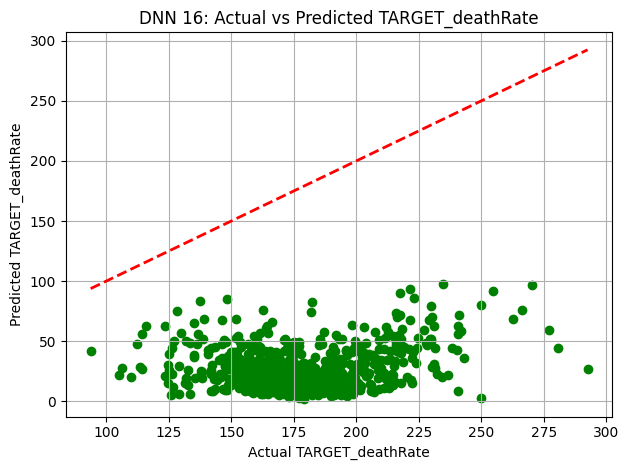

In [65]:
# DNN 16 Architecture

# Step 1: Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 2: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Step 3: Build the DNN model (30-8)
dnn_model_16 = Sequential()
dnn_model_16.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))
dnn_model_16.add(Dense(1))

# Step 4: Compile the model using SGD optimizer
optimizer = SGD(learning_rate=0.0001, clipvalue=1.0)
dnn_model_16.compile(optimizer=optimizer , loss='mse')

# Step 5: Train the model
history_16 = dnn_model_16.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, batch_size=32, verbose=0)

# Step 6: Predict on the test set
y_test_pred_16 = dnn_model_16.predict(X_test_scaled).flatten()

# Step 7: Compute the R-squared score for the test set
r2_dnn_16 = r2_score(y_test, y_test_pred_16)
mse_dnn16 = mean_squared_error(y_test, y_test_pred_16)
print(f"R-squared score for DNN (16): {r2_dnn_16}")
print(f"Mean Squared Error for DNN (16): {mse_dnn16}")

plt.scatter(y_test, y_test_pred_16, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('DNN 16: Actual vs Predicted TARGET_deathRate')
plt.xlabel('Actual TARGET_deathRate')
plt.ylabel('Predicted TARGET_deathRate')
plt.grid(True)

plt.tight_layout()
plt.show()

## **Function to Test the Trained DNN-16 Model**

In [66]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

def test_model_dnn(model, X_test_scaled, y_test):
    """
    Tests a trained DNN model on a scaled test dataset.

    Parameters:
    - model: Trained DNN model (Keras Sequential)
    - X_test_scaled: Scaled test features (numpy array)
    - y_test: True labels for the test set (numpy array)

    Returns:
    - r2: R² score of the model on the test set
    - mse: Mean Squared Error of the model on the test set
    """
    # Step 1: Use the trained DNN model to predict the test set
    y_test_pred = model.predict(X_test_scaled).flatten()  # Ensure the predictions are a flat array

    # Step 2: Evaluate the model's performance using R² and MSE
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Step 3: Print the evaluation metrics
    print(f"R-squared score for DNN: {test_r2}")
    print(f"Mean Squared Error for DNN: {test_mse}")

    # Step 4: Plot the actual vs predicted values
    plt.scatter(y_test, y_test_pred, color='green')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title('DNN: Actual vs Predicted TARGET_deathRate')
    plt.xlabel('Actual TARGET_deathRate')
    plt.ylabel('Predicted TARGET_deathRate')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Step 5: Return the metrics
    return test_r2, test_mse


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
R-squared score for DNN: -27.59299396651897
Mean Squared Error for DNN: 23396.082258273524


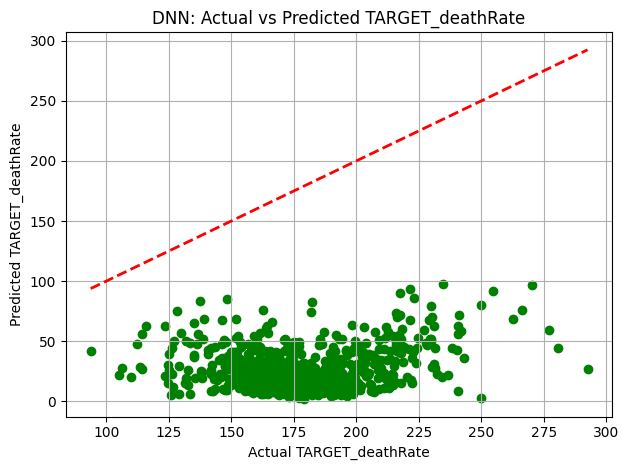

In [67]:
# Assume dnn_model_16 is already trained, and X_test_scaled, y_test are available

# Call the test_model_dnn function
r2, mse = test_model_dnn(dnn_model_16, X_test_scaled, y_test)


## **Training and Testing the DNN-30-8 Model**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R-squared score for DNN (30-8): -6.965103451332797
Mean Squared Error for DNN (30-8): 6517.408277050315


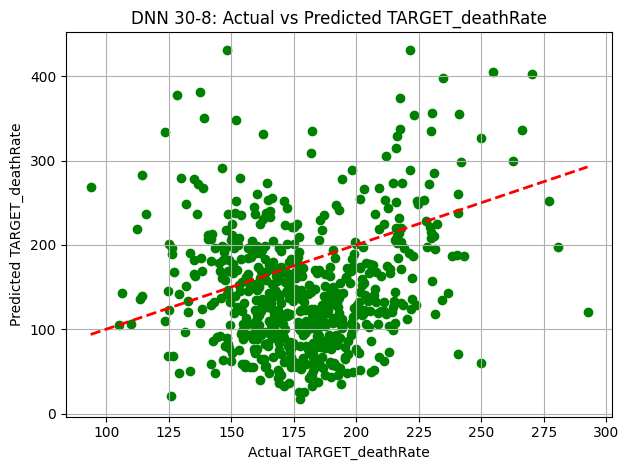

In [68]:
# DNN 30-8 Architecture

# Step 1: Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 2: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Step 3: Build the DNN model (30-8)
dnn_model_30_8 = Sequential()
dnn_model_30_8.add(Dense(30, input_dim=X_train_scaled.shape[1], activation='relu'))
dnn_model_30_8.add(Dense(8, activation='relu'))
dnn_model_30_8.add(Dense(1))

# Step 4: Compile the model using SGD optimizer
optimizer = SGD(learning_rate=0.0001, clipvalue=1.0)
dnn_model_30_8.compile(optimizer=optimizer , loss='mse')

# Step 5: Train the model
history_30_8 = dnn_model_30_8.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, batch_size=32, verbose=0)

# Step 6: Predict on the test set
y_test_pred_30_8 = dnn_model_30_8.predict(X_test_scaled).flatten()

# Step 7: Compute the R-squared score for the test set
r2_dnn_30_8 = r2_score(y_test, y_test_pred_30_8)
mse_dnn30_8 = mean_squared_error(y_test, y_test_pred_30_8)
print(f"R-squared score for DNN (30-8): {r2_dnn_30_8}")
print(f"Mean Squared Error for DNN (30-8): {mse_dnn30_8}")



plt.scatter(y_test, y_test_pred_30_8, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('DNN 30-8: Actual vs Predicted TARGET_deathRate')
plt.xlabel('Actual TARGET_deathRate')
plt.ylabel('Predicted TARGET_deathRate')
plt.grid(True)

plt.tight_layout()
plt.show()


## **Function to Test the Trained DNN-30-8 Model**

In [69]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

def test_model_dnn(model, X_test_scaled, y_test):
    """
    Tests a trained DNN model on a scaled test dataset.

    Parameters:
    - model: Trained DNN model (Keras Sequential)
    - X_test_scaled: Scaled test features (numpy array)
    - y_test: True labels for the test set (numpy array)

    Returns:
    - r2: R² score of the model on the test set
    - mse: Mean Squared Error of the model on the test set
    """
    # Step 1: Use the trained DNN model to predict the test set
    y_test_pred = model.predict(X_test_scaled).flatten()  # Ensure the predictions are a flat array

    # Step 2: Evaluate the model's performance using R² and MSE
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Step 3: Print the evaluation metrics
    print(f"R-squared score for DNN: {test_r2}")
    print(f"Mean Squared Error for DNN: {test_mse}")

    # Step 4: Plot the actual vs predicted values
    plt.scatter(y_test, y_test_pred, color='green')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title('DNN 30-8: Actual vs Predicted TARGET_deathRate')
    plt.xlabel('Actual TARGET_deathRate')
    plt.ylabel('Predicted TARGET_deathRate')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Step 5: Return the metrics
    return test_r2, test_mse


## **Training and Testing DNN-30-16-8 Model**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R-squared score for DNN (30-16-8): -2.4890593133397525
Mean Squared Error for DNN (30-16-8): 2854.906303078208


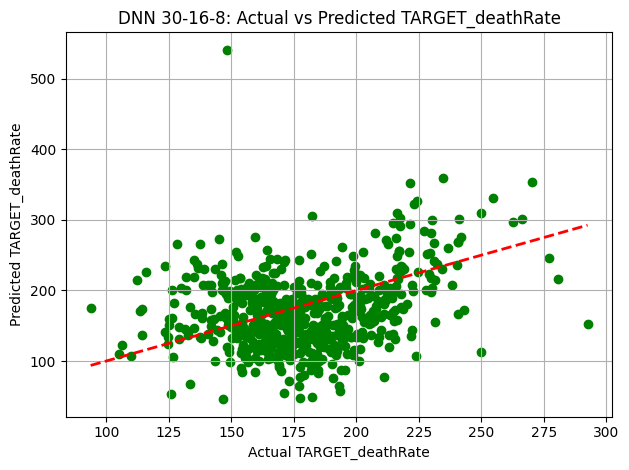

In [70]:
# DNN 30-16-8 Architecture

# Step 1: Build the DNN model (30-16-8)
dnn_model_30_16_8 = Sequential()
dnn_model_30_16_8.add(Dense(30, input_dim=X_train_scaled.shape[1], activation='relu'))
dnn_model_30_16_8.add(Dense(16, activation='relu'))
dnn_model_30_16_8.add(Dense(8, activation='relu'))
dnn_model_30_16_8.add(Dense(1))

# Step 2: Compile the model using SGD optimizer
optimizer = SGD(learning_rate=0.0001, clipvalue=1.0)
dnn_model_30_16_8.compile(optimizer=optimizer , loss='mse')

# Step 3: Train the model
history_30_16_8 = dnn_model_30_16_8.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, batch_size=32, verbose=0)

# Step 4: Predict on the test set
y_test_pred_30_16_8 = dnn_model_30_16_8.predict(X_test_scaled).flatten()

# Step 5: Compute the R-squared score for the test set
r2_dnn_30_16_8 = r2_score(y_test, y_test_pred_30_16_8)
mse_dnn30_16_8 = mean_squared_error(y_test, y_test_pred_30_16_8)
print(f"R-squared score for DNN (30-16-8): {r2_dnn_30_16_8}")
print(f"Mean Squared Error for DNN (30-16-8): {mse_dnn30_16_8}")

plt.scatter(y_test, y_test_pred_30_16_8, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('DNN 30-16-8: Actual vs Predicted TARGET_deathRate')
plt.xlabel('Actual TARGET_deathRate')
plt.ylabel('Predicted TARGET_deathRate')
plt.grid(True)

plt.tight_layout()
plt.show()


## **Function to Test the Trained DNN-30-16-8 Model**

In [71]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

def test_model_dnn_30_16_8(model, X_test_scaled, y_test):
    """
    Tests a trained DNN model (30-16-8 architecture) on a scaled test dataset.

    Parameters:
    - model: Trained DNN model (Keras Sequential)
    - X_test_scaled: Scaled test features (numpy array)
    - y_test: True labels for the test set (numpy array)

    Returns:
    - r2: R² score of the model on the test set
    - mse: Mean Squared Error of the model on the test set
    """
    # Step 1: Use the trained DNN model to predict the test set
    y_test_pred = model.predict(X_test_scaled).flatten()  # Ensure the predictions are a flat array

    # Step 2: Evaluate the model's performance using R² and MSE
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Step 3: Print the evaluation metrics
    print(f"R-squared score for DNN (30-16-8): {test_r2}")
    print(f"Mean Squared Error for DNN (30-16-8): {test_mse}")

    # Step 4: Plot the actual vs predicted values
    plt.scatter(y_test, y_test_pred, color='green')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title('DNN 30-16-8: Actual vs Predicted TARGET_deathRate')
    plt.xlabel('Actual TARGET_deathRate')
    plt.ylabel('Predicted TARGET_deathRate')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Step 5: Return the metrics
    return test_r2, test_mse


## **Training and Testing the DNN-30-16-8-4 Model**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R-squared score for DNN (30-16-8-4): -2.0952113205575635
Mean Squared Error for DNN (30-16-8-4): 2532.642043267649


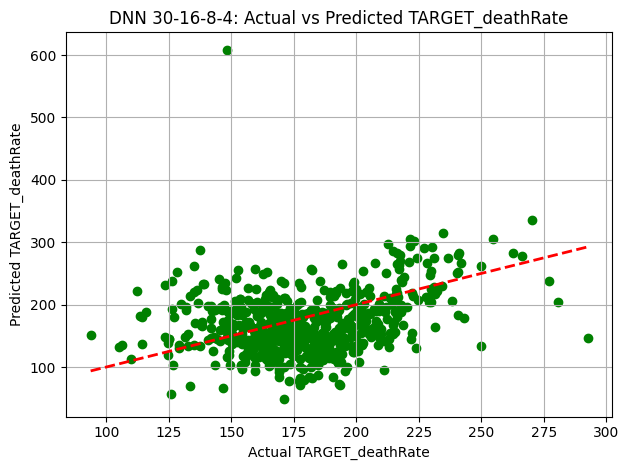

In [72]:
# DNN 30-16-8-4 Architecture

# Step 1: Build the DNN model (30-16-8-4)
dnn_model_30_16_8_4 = Sequential()
dnn_model_30_16_8_4.add(Dense(30, input_dim=X_train_scaled.shape[1], activation='relu'))
dnn_model_30_16_8_4.add(Dense(16, activation='relu'))
dnn_model_30_16_8_4.add(Dense(8, activation='relu'))
dnn_model_30_16_8_4.add(Dense(4, activation='relu'))
dnn_model_30_16_8_4.add(Dense(1))

# Step 2: Compile the model using SGD optimizer
optimizer = SGD(learning_rate=0.0001, clipvalue=1.0)
dnn_model_30_16_8_4.compile(optimizer=optimizer, loss='mse')

# Step 3: Train the model
history_30_16_8_4 = dnn_model_30_16_8_4.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, batch_size=32, verbose=0)

# Step 4: Predict on the test set
y_test_pred_30_16_8_4 = dnn_model_30_16_8_4.predict(X_test_scaled).flatten()

# Step 5: Compute the R-squared score for the test set
r2_dnn_30_16_8_4 = r2_score(y_test, y_test_pred_30_16_8_4)
mse_dnn30_16_8_4 = mean_squared_error(y_test, y_test_pred_30_16_8_4)
print(f"R-squared score for DNN (30-16-8-4): {r2_dnn_30_16_8_4}")
print(f"Mean Squared Error for DNN (30-16-8-4): {mse_dnn30_16_8_4}")

plt.scatter(y_test, y_test_pred_30_16_8_4, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('DNN 30-16-8-4: Actual vs Predicted TARGET_deathRate')
plt.xlabel('Actual TARGET_deathRate')
plt.ylabel('Predicted TARGET_deathRate')
plt.grid(True)

plt.tight_layout()
plt.show()


## **Function to Test the Trained DNN-30-16-8-4 Model**

In [73]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

def test_model_dnn_30_16_8_4(model, X_test_scaled, y_test):
    """
    Tests a trained DNN model (30-16-8-4 architecture) on a scaled test dataset.

    Parameters:
    - model: Trained DNN model (Keras Sequential)
    - X_test_scaled: Scaled test features (numpy array)
    - y_test: True labels for the test set (numpy array)

    Returns:
    - r2: R² score of the model on the test set
    - mse: Mean Squared Error of the model on the test set
    """
    # Step 1: Use the trained DNN model to predict the test set
    y_test_pred = model.predict(X_test_scaled).flatten()  # Ensure the predictions are a flat array

    # Step 2: Evaluate the model's performance using R² and MSE
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Step 3: Print the evaluation metrics
    print(f"R-squared score for DNN (30-16-8-4): {test_r2}")
    print(f"Mean Squared Error for DNN (30-16-8-4): {test_mse}")

    # Step 4: Plot the actual vs predicted values
    plt.scatter(y_test, y_test_pred, color='green')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title('DNN 30-16-8-4: Actual vs Predicted TARGET_deathRate')
    plt.xlabel('Actual TARGET_deathRate')
    plt.ylabel('Predicted TARGET_deathRate')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Step 5: Return the metrics
    return test_r2, test_mse


## **Plotting the Performance Measurement Graph for each model**

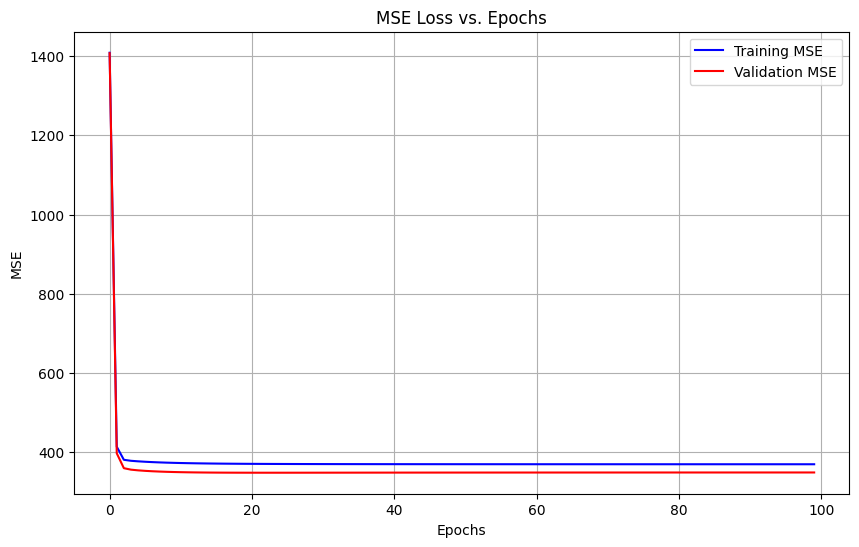

In [74]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Step 2: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Step 3: Initialize the SGDRegressor
sgd_regressor = SGDRegressor(max_iter=1, tol=None, eta0=0.001, learning_rate='constant', warm_start=True, random_state=42)

# Step 4: Create lists to store MSE for each epoch
train_mse_list = []
val_mse_list = []
n_epochs = 100  # Number of epochs

# Step 5: Train the model over multiple epochs and collect the MSE at each epoch
for epoch in range(n_epochs):
    sgd_regressor.fit(X_train_scaled, y_train)  # Train for 1 epoch

    # Predict on the training and validation set
    y_train_pred = sgd_regressor.predict(X_train_scaled)
    y_val_pred = sgd_regressor.predict(X_val_scaled)

    # Compute MSE for both training and validation set
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)

    # Store the MSE values
    train_mse_list.append(train_mse)
    val_mse_list.append(val_mse)

# Step 6: Plot the MSE loss vs. Epochs for training and validation set
plt.figure(figsize=(10, 6))
plt.plot(range(n_epochs), train_mse_list, label='Training MSE', color='blue')
plt.plot(range(n_epochs), val_mse_list, label='Validation MSE', color='red')
plt.title('MSE Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()


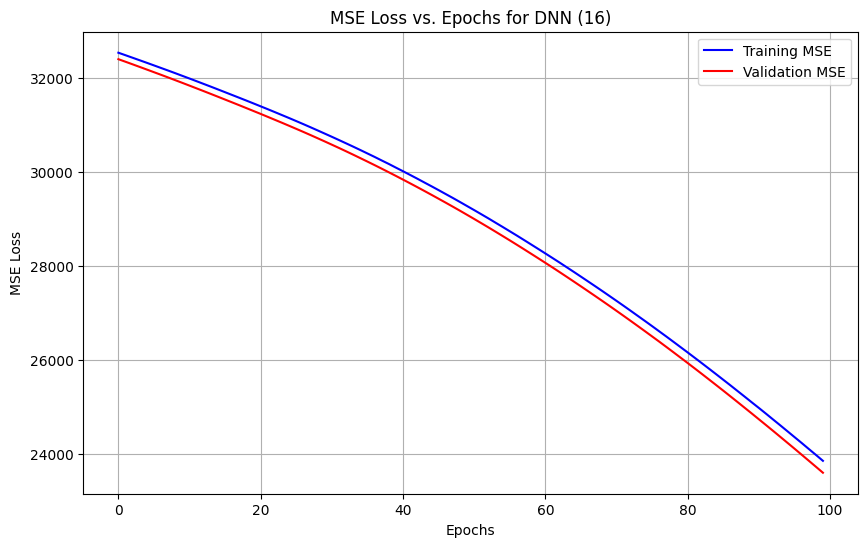

In [75]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Assuming you've already trained your DNN model (example for DNN 30-8), and have the 'history_30_8' object

# Step 1: Extract the loss (MSE) values from the history object
train_loss = history_16.history['loss']
val_loss = history_16.history['val_loss']

# Step 2: Plot the MSE loss vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training MSE', color='blue')
plt.plot(val_loss, label='Validation MSE', color='red')
plt.title('MSE Loss vs. Epochs for DNN (16)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid()
plt.show()


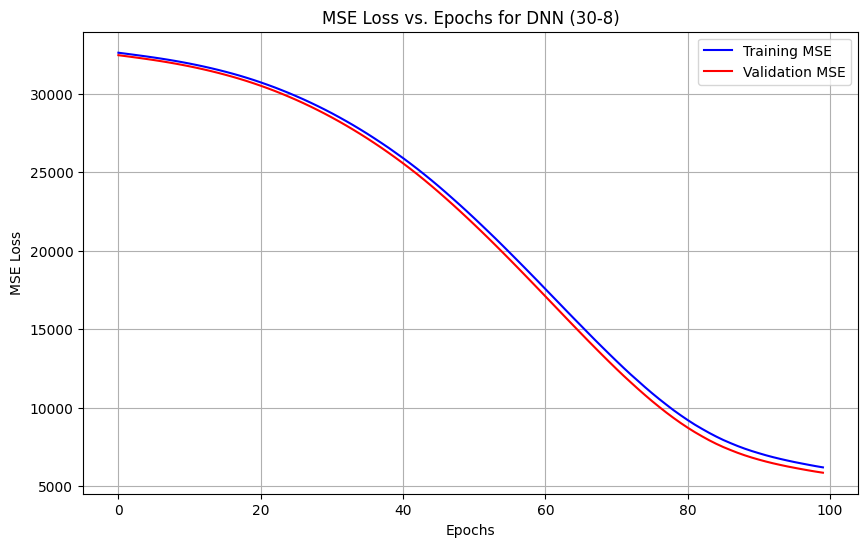

In [76]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Assuming you've already trained your DNN model (example for DNN 30-8), and have the 'history_30_8' object

# Step 1: Extract the loss (MSE) values from the history object
train_loss = history_30_8.history['loss']
val_loss = history_30_8.history['val_loss']

# Step 2: Plot the MSE loss vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training MSE', color='blue')
plt.plot(val_loss, label='Validation MSE', color='red')
plt.title('MSE Loss vs. Epochs for DNN (30-8)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid()
plt.show()


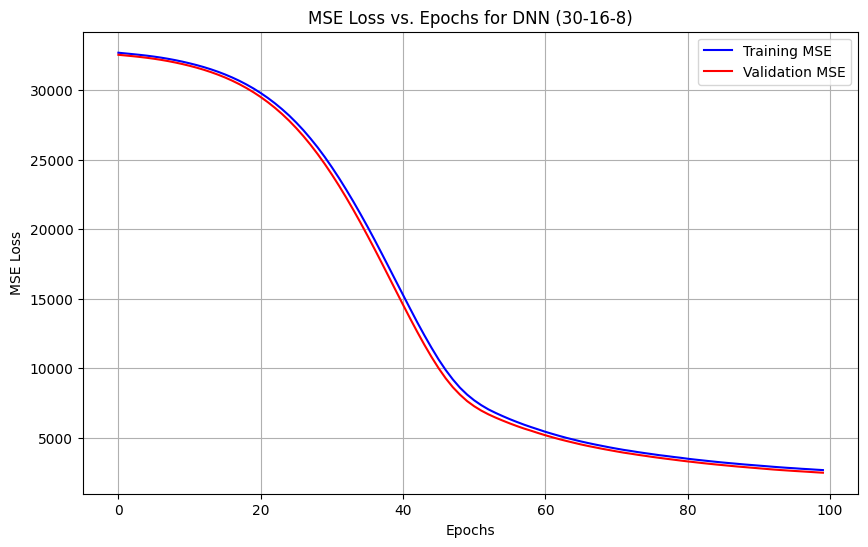

In [77]:
# Assuming you've trained the DNN 30-16-8 and have the 'history_30_16_8' object

# Step 1: Extract the loss (MSE) values from the history object
train_loss_30_16_8 = history_30_16_8.history['loss']
val_loss_30_16_8 = history_30_16_8.history['val_loss']

# Step 2: Plot the MSE loss vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(train_loss_30_16_8, label='Training MSE', color='blue')
plt.plot(val_loss_30_16_8, label='Validation MSE', color='red')
plt.title('MSE Loss vs. Epochs for DNN (30-16-8)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid()
plt.show()


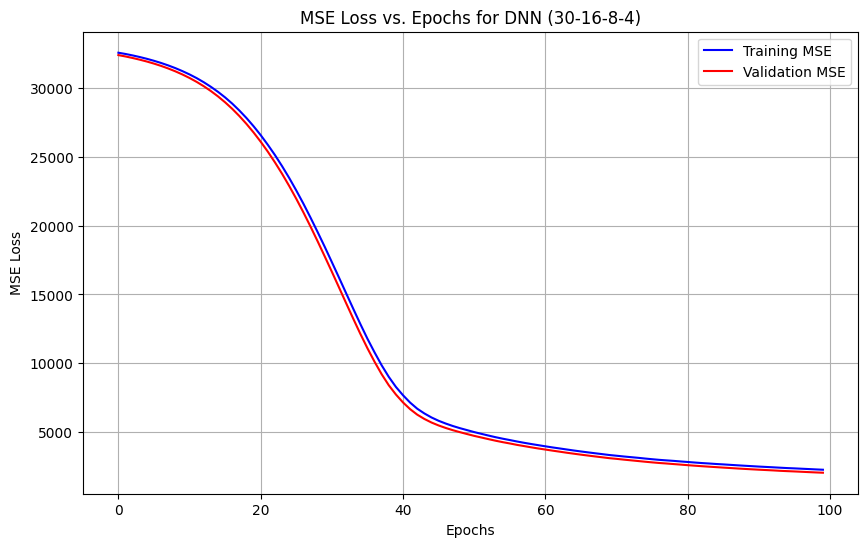

In [78]:
# Assuming you've trained the DNN 30-16-8-4 and have the 'history_30_16_8_4' object

# Step 1: Extract the loss (MSE) values from the history object
train_loss_30_16_8_4 = history_30_16_8_4.history['loss']
val_loss_30_16_8_4 = history_30_16_8_4.history['val_loss']

# Step 2: Plot the MSE loss vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(train_loss_30_16_8_4, label='Training MSE', color='blue')
plt.plot(val_loss_30_16_8_4, label='Validation MSE', color='red')
plt.title('MSE Loss vs. Epochs for DNN (30-16-8-4)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid()
plt.show()


## **Test all models**

Running tests on all models...

Testing DNN-16...
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
R-squared score for DNN-16: -27.59299396651897
Mean Squared Error for DNN-16: 23396.082258273524


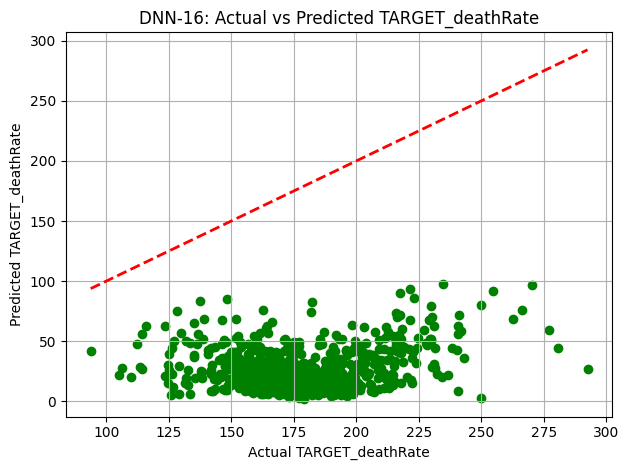

Testing DNN-30-8...
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
R-squared score for DNN-30-8: -6.965103451332797
Mean Squared Error for DNN-30-8: 6517.408277050315


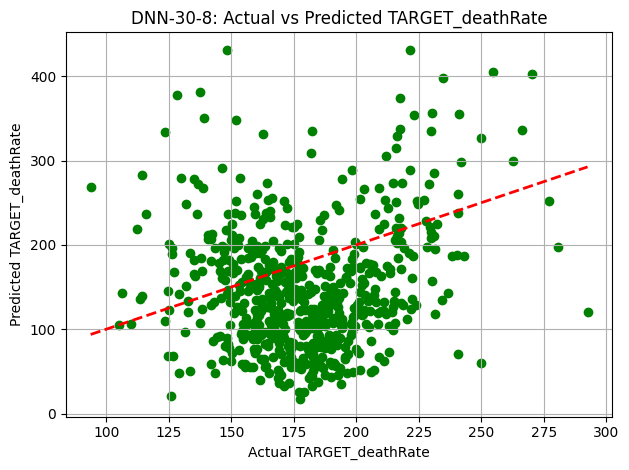

Testing DNN-30-16-8...
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
R-squared score for DNN-30-16-8: -2.4890593133397525
Mean Squared Error for DNN-30-16-8: 2854.906303078208


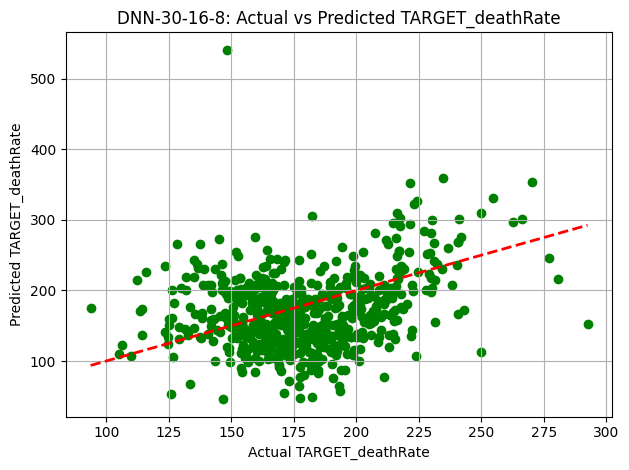

Testing DNN-30-16-8-4...
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R-squared score for DNN-30-16-8-4: -2.0952113205575635
Mean Squared Error for DNN-30-16-8-4: 2532.642043267649


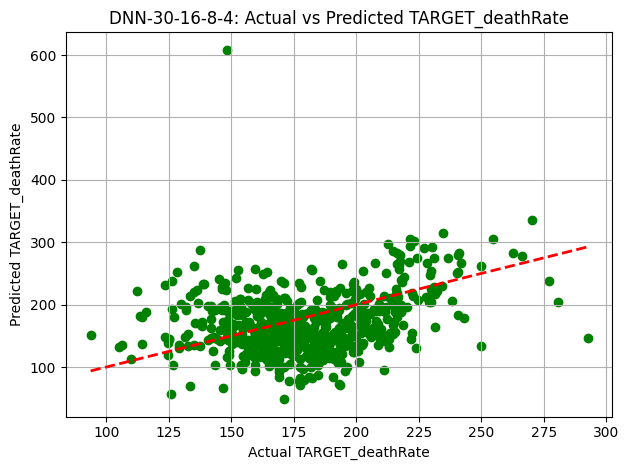

Testing Linear Regression model...


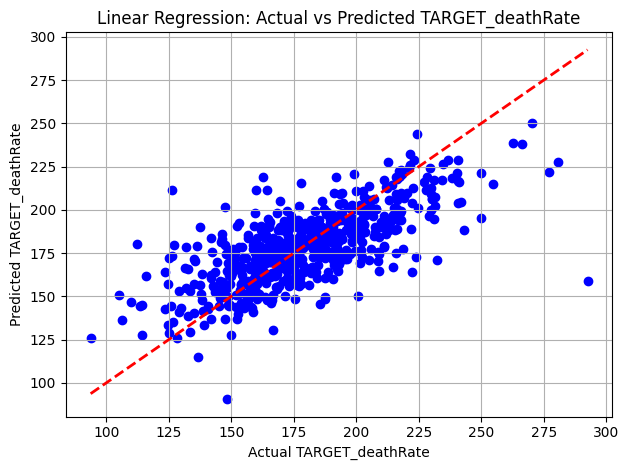

Test R-squared (R2 Score): 0.5025547727059029
Test Mean Squared Error (MSE): 407.03220762352214
All models have been tested.
README.txt file has been created.


In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Function to test DNN models
def test_model_dnn(model, X_test_scaled, y_test, model_name):
    """
    Tests a trained DNN model on a scaled test dataset.

    Parameters:
    - model: Trained DNN model (Keras Sequential)
    - X_test_scaled: Scaled test features (numpy array)
    - y_test: True labels for the test set (numpy array)
    - model_name: String, name of the model for display purposes

    Returns:
    - r2: R² score of the model on the test set
    - mse: Mean Squared Error of the model on the test set
    """
    # Predict the test set
    y_test_pred = model.predict(X_test_scaled).flatten()

    # Calculate R² and MSE
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Print evaluation metrics
    print(f"R-squared score for {model_name}: {test_r2}")
    print(f"Mean Squared Error for {model_name}: {test_mse}")

    # Plot actual vs predicted values
    plt.scatter(y_test, y_test_pred, color='green')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'{model_name}: Actual vs Predicted TARGET_deathRate')
    plt.xlabel('Actual TARGET_deathRate')
    plt.ylabel('Predicted TARGET_deathRate')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return test_r2, test_mse



def test_model(model, X_test, y_test, model_name):
    """
    Tests a trained regression model on a test dataset.

    Parameters:
    - model: Trained regression model
    - X_test: Test features (numpy array or pandas DataFrame)
    - y_test: True labels for the test set (numpy array or pandas Series)

    Returns:
    - r2: R² score of the model on the test set
    - mse: Mean Squared Error of the model on the test set
    """
    # Step 1: Use the trained model to predict the test set
    y_test_pred = model.predict(X_test)

    # Step 2: Evaluate the model's performance using R² and MSE
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Plot actual vs predicted values
    plt.scatter(y_test, y_test_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'{model_name}: Actual vs Predicted TARGET_deathRate')
    plt.xlabel('Actual TARGET_deathRate')
    plt.ylabel('Predicted TARGET_deathRate')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Step 3: Print the evaluation metrics
    print(f"Test R-squared (R2 Score): {test_r2}")
    print(f"Test Mean Squared Error (MSE): {test_mse}")

    # Step 4: Return the metrics
    return test_r2, test_mse


# Example usage for the previously defined models
def run_tests_on_all_models():
    print("Running tests on all models...\n")

    # Assuming the models are already trained
    print("Testing DNN-16...")
    test_model_dnn(dnn_model_16, X_test_scaled, y_test, "DNN-16")

    print("Testing DNN-30-8...")
    test_model_dnn(dnn_model_30_8, X_test_scaled, y_test, "DNN-30-8")

    print("Testing DNN-30-16-8...")
    test_model_dnn(dnn_model_30_16_8, X_test_scaled, y_test, "DNN-30-16-8")

    print("Testing DNN-30-16-8-4...")
    test_model_dnn(dnn_model_30_16_8_4, X_test_scaled, y_test, "DNN-30-16-8-4")

    print("Testing Linear Regression model...")
    test_model(linear_model, X_test, y_test, "Linear Regression")

    print("All models have been tested.")

# Call this function to run tests on all models
run_tests_on_all_models()

# Function to create README.txt
def create_readme():
    readme_content = """
    # Instructions for Testing Deep Neural Network and Linear Regression Models

    This notebook allows you to test the performance of various DNN models and a Linear Regression model on the provided test dataset.

    ## Pre-requisites:
    - Ensure all models (DNN-16, DNN-30-8, DNN-30-16-8, DNN-30-16-8-4, and Linear Regression) are trained.
    - Test features (X_test_scaled) and test labels (y_test) should be available and preprocessed before testing.

    ## Steps to Test Models:
    1. After running all cells, the function `run_tests_on_all_models()` will automatically test the performance of the following models:
       - DNN-16
       - DNN-30-8
       - DNN-30-16-8
       - DNN-30-16-8-4
       - Linear Regression

    2. Each model is tested on the test dataset, and the following metrics are displayed:
       - R-squared (R²) score
       - Mean Squared Error (MSE)

    3. Additionally, a scatter plot comparing the actual vs. predicted values of the target variable will be shown for each model.

    ## Custom Testing:
    If you want to test individual models, you can call the respective testing function for each model:

    - For DNN models:

    ```
    test_model_dnn(model, X_test_scaled, y_test, model_name)
    ```

    Example:

    ```
    test_model_dnn(dnn_model_16, X_test_scaled, y_test, "DNN-16")
    ```

    - For Linear Regression model:

    ```
    test_model_linear(lr_model, X_test_scaled, y_test, model_name)
    ```

    Example:

    ```
    test_model_linear(lr_model, X_test_scaled, y_test, "Linear Regression")
    ```

    ## Contact
    For any issues or further clarifications, please contact the notebook author.
    """

    # Write to README.txt
    with open("README.txt", "w") as f:
        f.write(readme_content)
    print("README.txt file has been created.")

# Create the README file after running all the tests
create_readme()
